In [31]:
import numpy as np
import pandas as pd

In [32]:
file_name='C:/Users/vande/Desktop/project_price_car/Car_sales.csv'
car_sales=pd.read_csv(file_name)


###
 PEGANDO DADO DE UM DATASET



In [33]:
car_sales

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [34]:
car_sales.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [35]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

import statsmodels.api as sm
from scipy import stats

### Modelling 

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

### Tabulating the results

from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')


In [36]:
#modificando os tipodes de dados das coluna para category
car_sales.Manufacturer= car_sales.Manufacturer.astype('category')
car_sales.Model = car_sales.Model.astype('category')
car_sales.Vehicle_type = car_sales.Vehicle_type.astype('category')

In [37]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         157 non-null    category
 1   Model                157 non-null    category
 2   Sales_in_thousands   157 non-null    float64 
 3   __year_resale_value  121 non-null    float64 
 4   Vehicle_type         157 non-null    category
 5   Price_in_thousands   155 non-null    float64 
 6   Engine_size          156 non-null    float64 
 7   Horsepower           156 non-null    float64 
 8   Wheelbase            156 non-null    float64 
 9   Width                156 non-null    float64 
 10  Length               156 non-null    float64 
 11  Curb_weight          155 non-null    float64 
 12  Fuel_capacity        156 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        157 non-null    object  
 15  Power_perf_factor    15

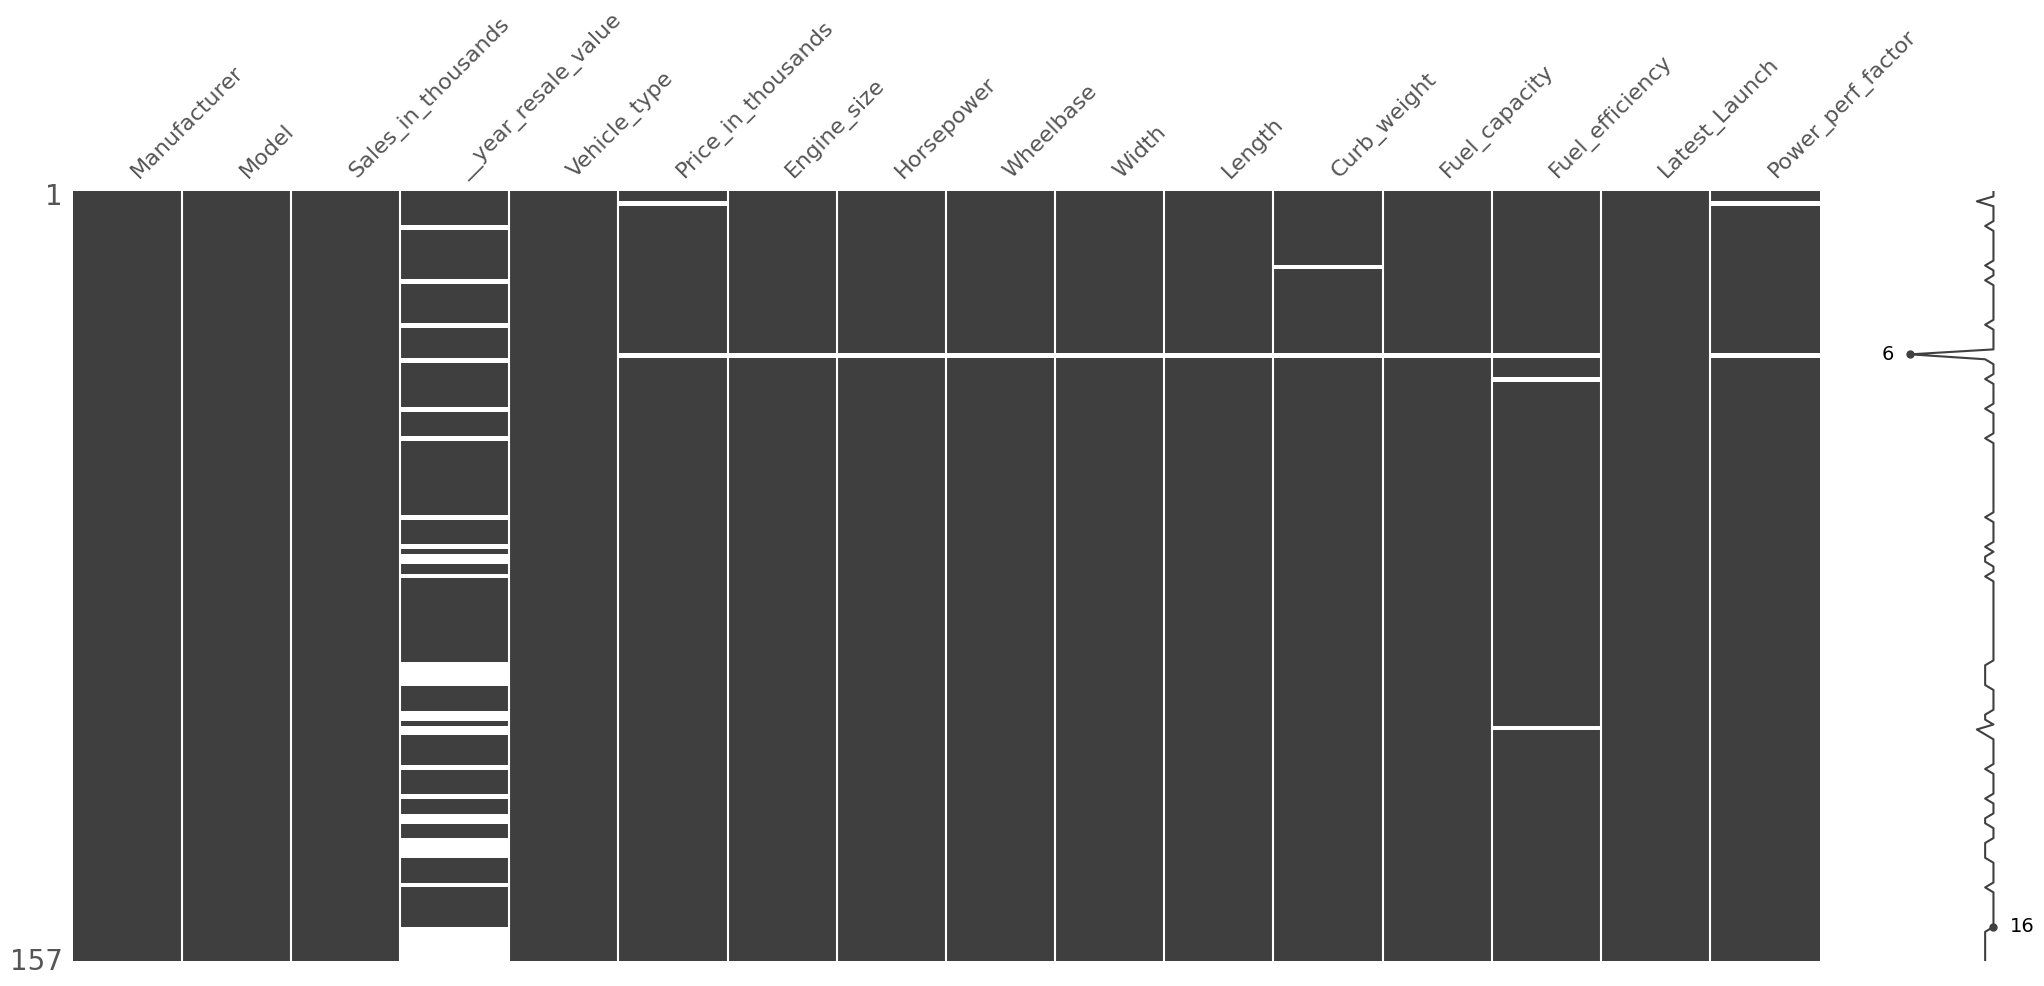

In [38]:
# visual representation of the mission data in the dataset with missingno
missingno.matrix(car_sales);

In [39]:
car_sales.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [40]:
manufact_count=car_sales['Manufacturer'].value_counts(dropna=False)
manufact_count

Manufacturer
Dodge         11
Ford          11
Mercedes-B     9
Toyota         9
Chevrolet      9
Nissan         7
Chrysler       7
Mitsubishi     7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

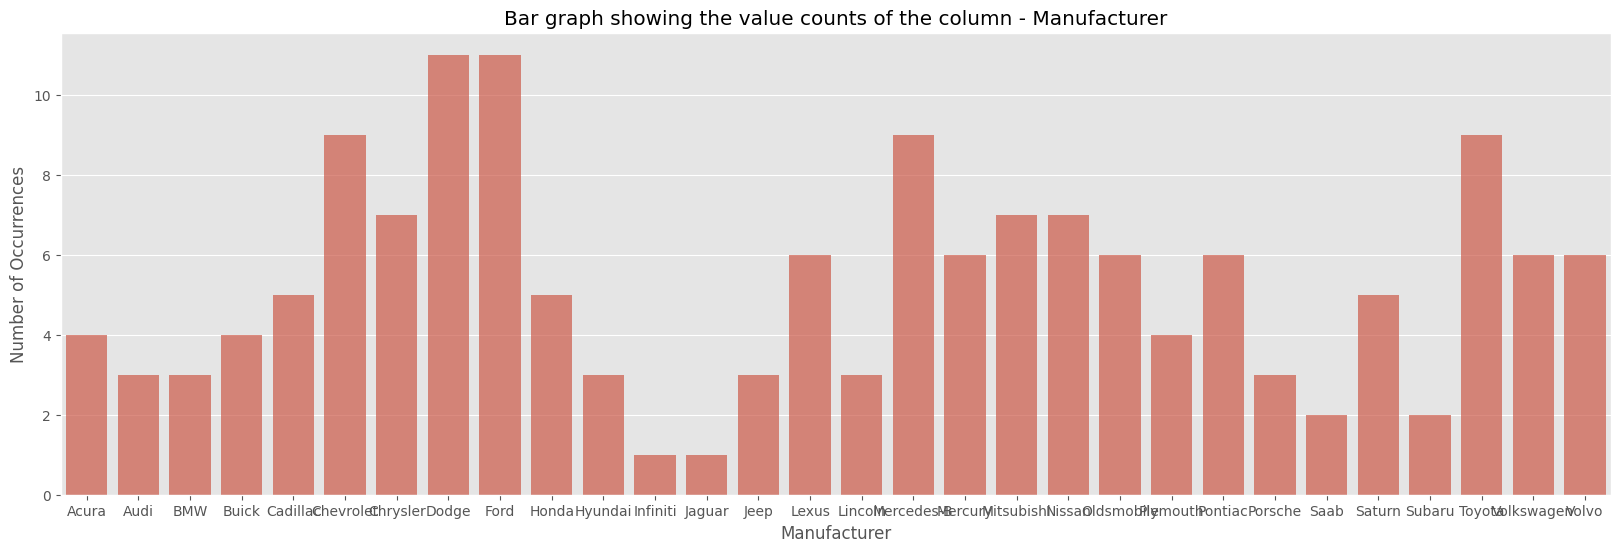

In [41]:
## cars by branch
plt.figure(figsize = (20, 6))
sns.barplot(x=manufact_count.index, y=manufact_count.values, alpha =0.7)
plt.title('Bar graph showing the value counts of the column - Manufacturer')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Manufacturer', fontsize = 12)
plt.show()

In [42]:
# preco medio por fabricadora
mean=car_sales.groupby('Manufacturer')['Price_in_thousands'].mean().reset_index()
mean



,Manufacturer,Price_in_thousands
0,Acura,30.633333
1,Audi,39.980000
2,BMW,33.096667
3,Buick,26.781250
4,Cadillac,40.254000
5,Chevrolet,20.022778
6,Chrysler,23.430833
7,Dodge,24.213636
8,Ford,21.047273
9,Honda,20.277000


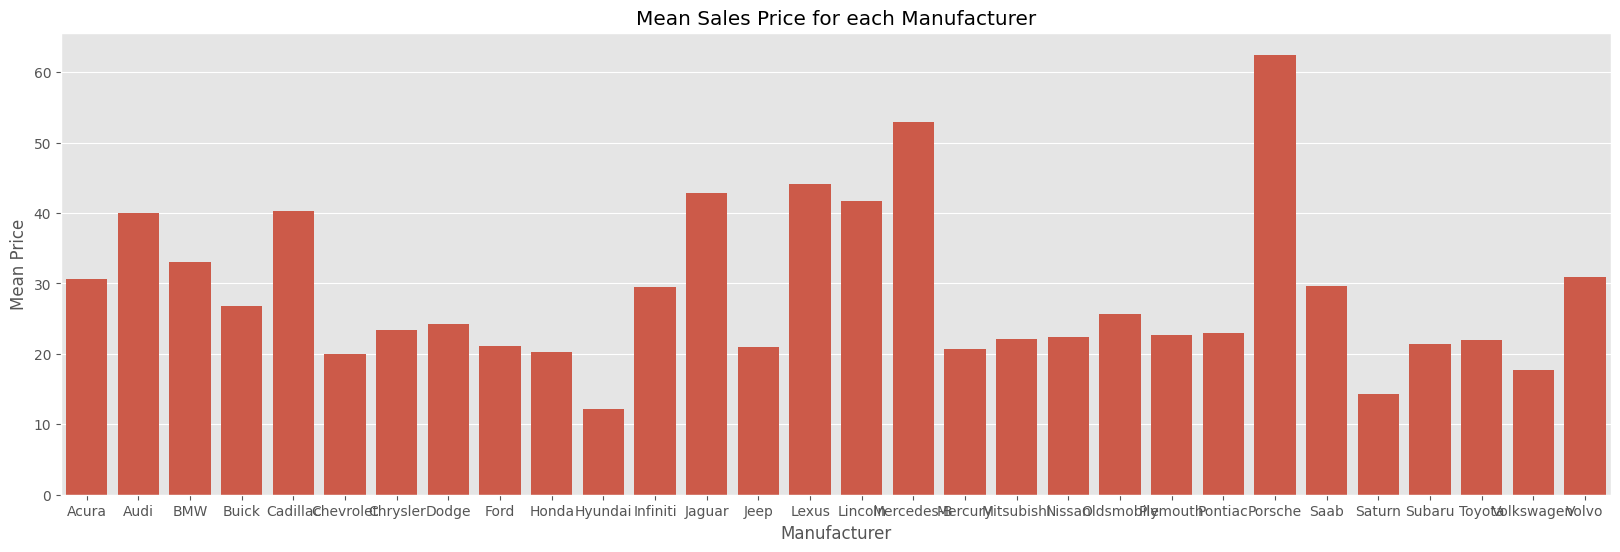

In [43]:
plt.figure(figsize=(20,6))
sns.barplot(x=mean['Manufacturer'],y=mean['Price_in_thousands'])
plt.title('Mean Sales Price for each Manufacturer')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Manufacturer', fontsize = 12)
plt.show()

In [44]:
# vendo a quantidade de cada tipo de veiculo
vehicle_count=car_sales['Vehicle_type'].value_counts(dropna = False).reset_index()
type(vehicle_count)

vehicle_count.rename(columns={'count': 'count_vehicle'}, inplace=True)
vehicle_count

,Vehicle_type,count_vehicle
0,Passenger,116
1,Car,41


In [45]:
#valor dos carros por tipo
mean_price = car_sales[['Vehicle_type', 'Price_in_thousands']]
mean_type=mean_price.groupby('Vehicle_type').mean().reset_index()
mean_type

,Vehicle_type,Price_in_thousands
0,Car,26.319975
1,Passenger,27.763200


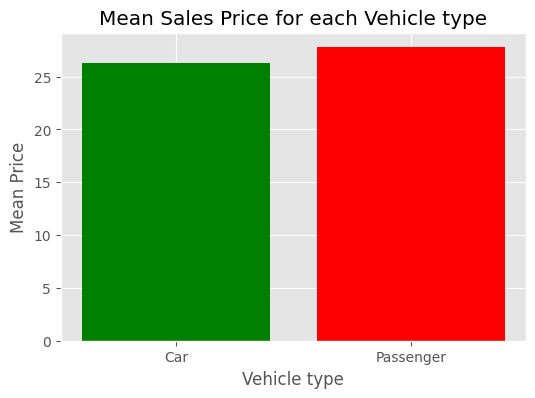

In [46]:
# graph with mean price for each type of vehicle
plt.figure(figsize=(6,4))
cores=['green','red']
plt.bar(mean_type['Vehicle_type'],mean_type['Price_in_thousands'],color=cores)
plt.title('Mean Sales Price for each Vehicle type')
plt.ylabel('Mean Price', fontsize = 12)
plt.xlabel('Vehicle type', fontsize = 12)
plt.style.use('ggplot')

plt.show()

Text(0.5, 1.0, 'Distribution of the column - Sales in thousands')

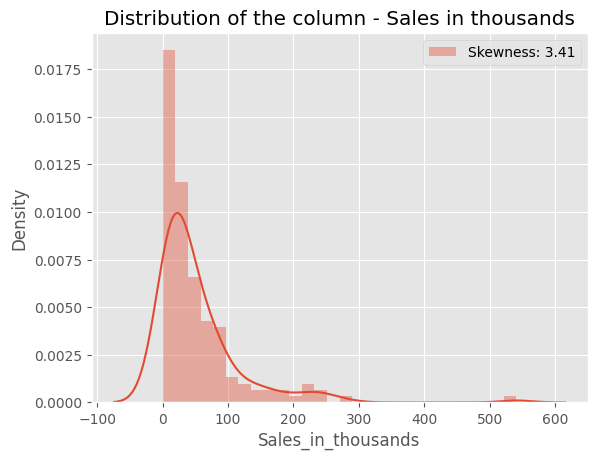

In [48]:
### Understanding the distribution of the column - Sales_in_thousands

sns.distplot(car_sales['Sales_in_thousands'], label = 'Skewness: %.2f'%(car_sales['Sales_in_thousands'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Sales in thousands')